In [1]:
#pip install -q tensorflow tensorflow-datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [3]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\86183\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dat

In [4]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


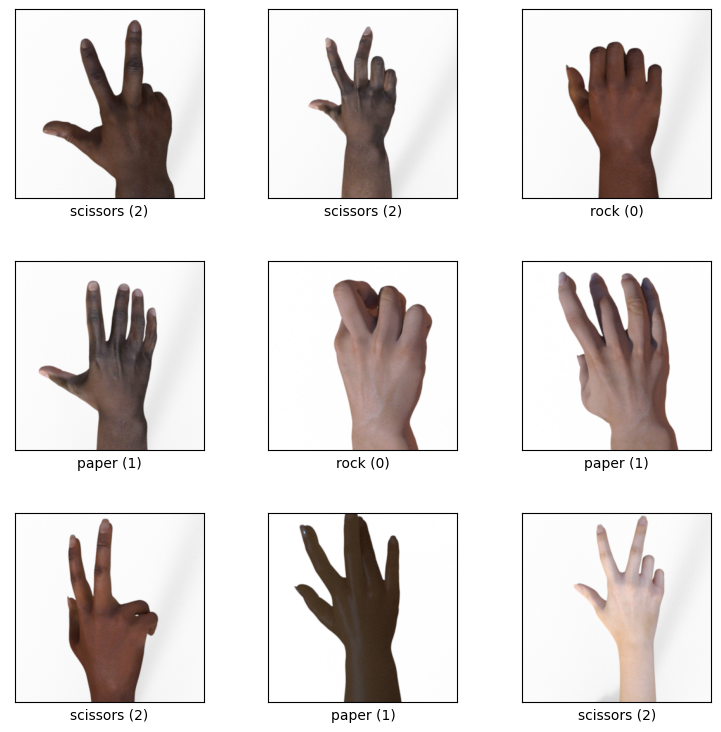

In [5]:
fig = tfds.show_examples(info, ds_train)

In [6]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])

train_labels = np.array([example['label'].numpy() for example in ds_train])

In [7]:
test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])

test_labels = np.array([example['label'].numpy() for example in ds_test])

In [8]:
type(train_images[0])

numpy.ndarray

In [9]:
train_images.shape

(2520, 300, 300)

In [10]:
train_images = train_images.reshape(2520, 300, 300, 1)

test_images = test_images.reshape(372, 300, 300, 1)

In [11]:
train_images = train_images.astype('float32')

test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [32]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [33]:
model.fit(train_images, train_labels, batch_size=16, epochs=5)

Epoch 1/5
158/158 [==============================] - 27s 169ms/step - loss: 15.9376 - accuracy: 0.4837
Epoch 2/5
158/158 [==============================] - 24s 152ms/step - loss: 0.7858 - accuracy: 0.7472
Epoch 3/5
158/158 [==============================] - 25s 160ms/step - loss: 0.7028 - accuracy: 0.7687
Epoch 4/5
 10/158 [>.............................] - ETA: 27s - loss: 1.0552 - accuracy: 0.6812

KeyboardInterrupt: 

In [30]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 25ms/step - loss: 1.6653 - accuracy: 0.5349


[1.66529381275177, 0.5349462628364563]

# CNN

In [34]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                        input_shape=(300, 300, 1)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

In [35]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [36]:
model.fit(train_images, train_labels, batch_size=16, epochs=5)

Epoch 1/5
150/158 [===========================>..] - ETA: 19s - loss: 2.8730 - accuracy: 0.7296

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_images, test_labels)

## Better Net

In [ ]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6, strides=3, input_shape(300, 300, 1)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, batch_size=16, epochs=5)

In [ ]:
model.evaluate(test_images, test_labels)

## Tuning

In [38]:
#pip install -U keras-tuner

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [12]:
from keras_tuner import RandomSearch


def build_model(hp):
    model = keras.Sequential()

    model.add(keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)))

    model.add(keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(keras.layers.Conv2D(32, 3, activation='relu'))

    model.add(keras.layers.MaxPool2D(2, 2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(
        hp.Choice("Dense layer", [64, 128, 256, 512]), activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [13]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32
)

In [15]:
tuner.search(train_images, train_labels, validation_data=(
    test_images, test_labels), epochs=10, batch_size=32)

Trial 4 Complete [00h 07m 13s]
val_accuracy: 0.7231183052062988

Best val_accuracy So Far: 0.7231183052062988
Total elapsed time: 00h 29m 48s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [18]:
image = train_images[0].reshape(300, 300)

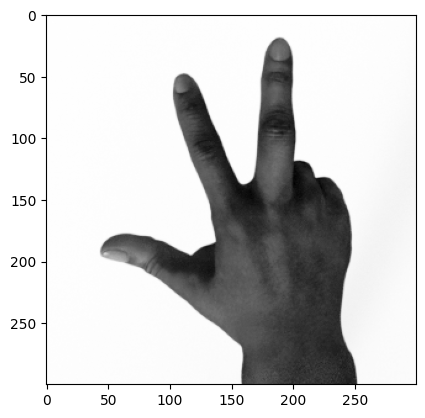

In [19]:
plt.imshow(train_images[0], cmap='Greys_r')

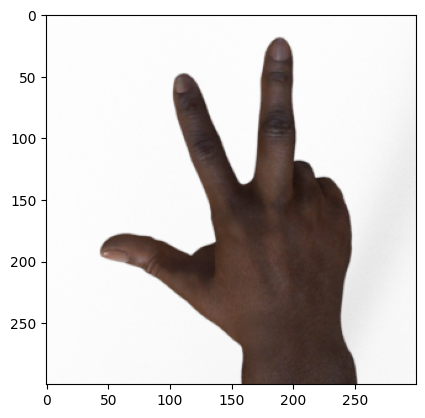

In [20]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_images = rgb_images[0]

image = train_images[0].reshape(300, 300)

plt.imshow(rgb_images)